In [1]:
import osmnx as ox
import networkx as nx
import os
import numpy as np
%matplotlib inline

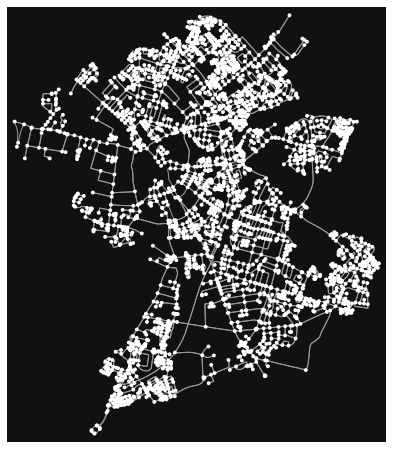

In [2]:
G = ox.graph_from_place('Cambridge, UK', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G))

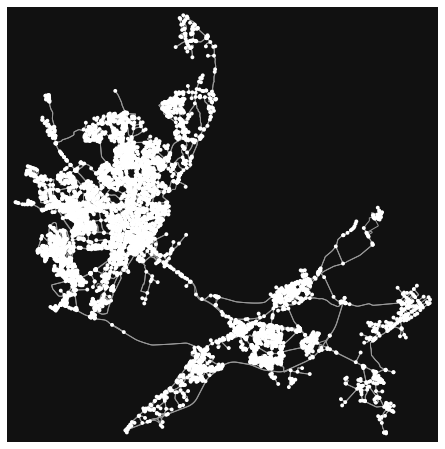

In [3]:
szczecin = ox.graph_from_place('Szczecin', network_type = 'drive')
fig,ax = ox.plot_graph(szczecin)

In [11]:
def save_graph(G, place_name):
    filepath = '../../data/' + place_name + '.graphml'

    if not os.path.exists(filepath):
        ox.save_graphml(G, filepath)

In [5]:
#saving data about my home city

In [6]:
save_graph(szczecin, 'szczecin')

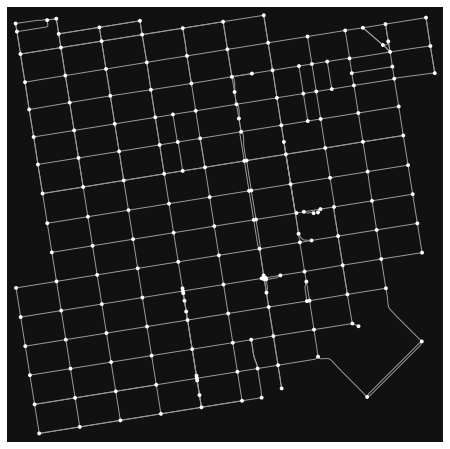

In [7]:
#mostly taken from https://geoffboeing.com/2017/01/square-mile-street-network-visualization/
def save_small_networks():
    G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
    save_graph(G, 'small_ny')
    
    G = ox.graph_from_point((37.79, -122.41), dist=750, network_type='drive')
    ox.plot_graph(G)
    save_graph(G, 'somewhere')
    
save_small_networks()

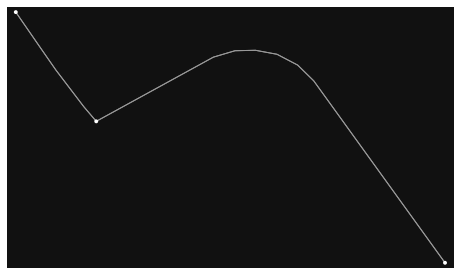

In [8]:
G = ox.graph_from_point((37.60, -122.40), dist=200, network_type='drive')
ox.plot_graph(G)
save_graph(G, 'small_somewhere')

In [4]:
def get_simple_description(graph, mapping):
    edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
    lengths = edges['length'].values

    edgelist = []
    it = 0
    for edge in graph.edges():
        a = mapping[edge[0]]
        b = mapping[edge[1]]

        edgelist.append((a, b, lengths[it]))
        it += 1

    return edgelist

In [5]:
def get_coordinates(graph, geom, mapping):
    coords = [(0.0, 0.0) for node in range(len(graph.nodes()))]
    for node in graph.nodes():
        coords[mapping[node]] = geom[node].x, geom[node].y
    
    return coords

In [6]:
def save_as_simple_edgelist(graph, place_name, mapping, nodes_geometry):
    filepath = '../../data/' + place_name + '.txt'
    edgelist = get_simple_description(graph, mapping)
    node_coords = get_coordinates(graph, nodes_geometry, mapping)
    n = len(graph.nodes())
    
    with open(filepath, 'w') as file:
        file.write(str(n) + ' ' + str(len(edgelist)) + '\n')
        for coords in node_coords:
            file.write(str(coords[0]) + ' ' + str(coords[1]) + '\n')
            
        for e in edgelist:
            file.write(str(e[0]) + ' ' + str(e[1]) + ' ' + str(e[2]) + '\n')

In [7]:
def calculate_node_mappings(graph):
    init_to_clear = {}
    clear_to_init = {}
    it = 0
    for u in graph.nodes():
        init_to_clear[u] = it
        clear_to_init[it] = u
        it += 1
        
    return init_to_clear, clear_to_init

In [8]:
def save_shortest_distances(graph, name, rev_map):
    filepath = '../../data/' + name + '_ans.txt'
    n = len(graph.nodes())
    
    with open(filepath, 'w') as file:
        file.write(str(n) + '\n')
        for i in range(n):
            for j in range(n):
                try:
                    dt = nx.shortest_path_length(graph, rev_map[i], rev_map[j], weight='length')
                except nx.NetworkXNoPath:
                    dt = 1000000000.0
                
                file.write(str(dt))
                file.write(' ')
            
            file.write('\n')

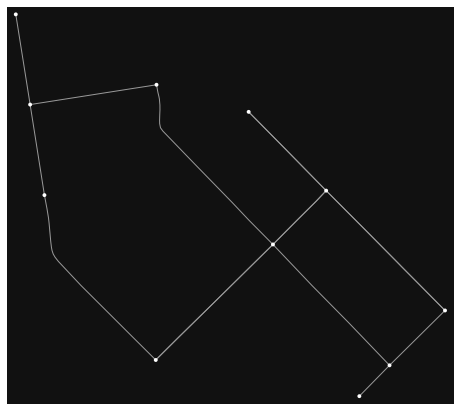

                                                                   osmid  \
u        v        key                                                      
65300097 65329980 0                                             88572965   
         65334111 0          [88597544, 111552058, 255330068, 417396858]   
65305814 65329980 0    [8918656, 328876704, 736374827, 766116625, 133...   
65306797 65317030 0          [736359897, 736359898, 88559691, 633791726]   
         65306800 0                               [417400728, 850228676]   
65306800 65306802 0                                            706532925   
65314146 65303533 0                               [224316520, 406944778]   
         65305814 0                    [766116624, 224316522, 417101715]   
65317028 65317030 0                                             88597577   
65317030 65329980 0                                             88559669   
         65317028 0                                             88597577   
         653

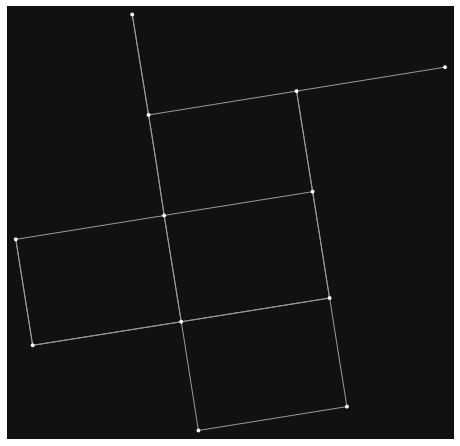

                                            osmid                name  \
u          v          key                                               
65295332   65307404   0                  25372932  Leavenworth Street   
           65295336   0                 144346316   California Street   
65295336   65352454   0                  26988009         Hyde Street   
           65295337   0                 144346316   California Street   
           65295332   0                 144346316   California Street   
           65307408   0                 770522074         Hyde Street   
65295337   65307412   0                  27167298       Larkin Street   
           65295336   0                 144346316   California Street   
65307404   65336987   0                  25372932  Leavenworth Street   
           65295332   0                  25372932  Leavenworth Street   
           65307408   0                 425516617   Sacramento Street   
65307408   65307412   0                 425516617  

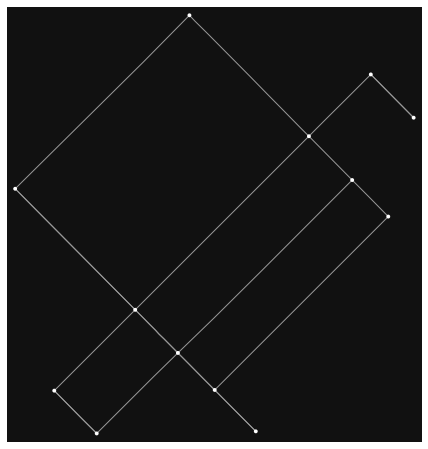

                                                   osmid   lanes  \
u        v        key                                              
65281916 65325050 0                            214545530       4   
65306804 65317542 0               [397145821, 397145254]       5   
         65306810 0                            417400750       4   
65306810 65317544 0    [397127921, 397127922, 408591443]       4   
65317538 65329019 0                              8922858     NaN   
65317542 65317538 0                            255168047       4   
         65351775 0                            397145255       3   
65317544 65325041 0                            214545530       4   
         65306810 0    [397127921, 397127922, 408591443]       4   
         65317542 0               [617990571, 419633751]  [4, 3]   
65317547 65353927 0                              8920934     NaN   
         65317544 0                            617268040       3   
65325041 65353927 0                             

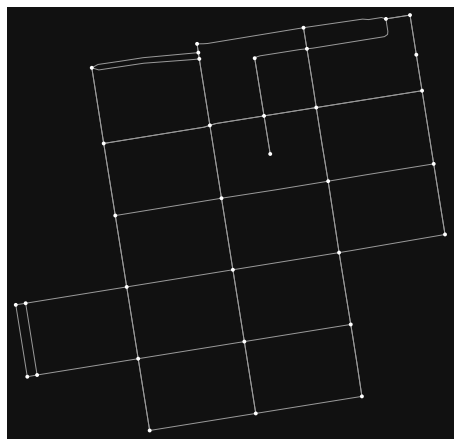

                                           osmid  oneway lanes  \
u          v         key                                         
65307408   65307412  0                 425516617    True     2   
           65336993  0                 770522074   False   NaN   
65307412   65336999  0                  27167298   False   NaN   
           65307414  0                 425516617    True     2   
65307414   65327171  0                 212214144   False     2   
...                                          ...     ...   ...   
295187181  612771029 0                  87376666    True   NaN   
612771029  65333949  0                  87376681   False   NaN   
2081671274 65336993  0    [254758121, 770522074]   False   NaN   
           65362171  0    [770522137, 399156535]    True   NaN   
           65337421  0     [770522136, 26938418]   False   NaN   

                                       name      highway   length  \
u          v         key                                            
653

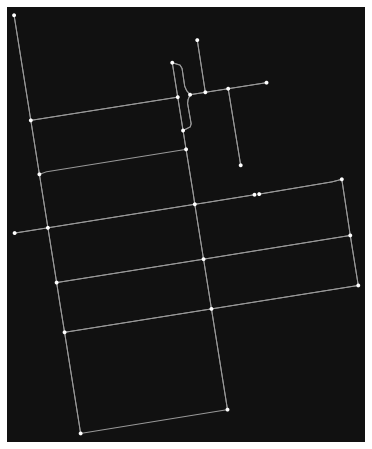

                               osmid                name      highway  oneway  \
u          v          key                                                       
65299375   4018840068 0      8916567      Vallejo Street  residential   False   
65299382   420519029  0      8916567      Vallejo Street  residential   False   
           4018840068 0      8916567      Vallejo Street  residential   False   
           65310787   0      8917133  Russian Hill Place  residential   False   
65299384   420519156  0     30029878        Jones Street  residential   False   
...                              ...                 ...          ...     ...   
4018840068 65299382   0      8916567      Vallejo Street  residential   False   
           65299375   0      8916567      Vallejo Street  residential   False   
           65360303   0      8920807     Florence Street  residential   False   
7231544188 65333898   0    563092519            Broadway  residential   False   
7231544189 65334046   0     

In [79]:
def prepare_small_testcases(num_testcases):
    np.random.seed(42)
    for nt in range(num_testcases):
        name = 'test_' + str(nt)
        #these are new york center coordinates, there should be plenty of roads there
        X = 37.79 + np.random.uniform(-0.01, 0.01)
        Y = -122.41 + np.random.uniform(-0.01, 0.01)
        
        G = ox.graph_from_point((X, Y), dist=np.random.uniform(200, 300), network_type='drive')
        nodes_geometry = ox.graph_to_gdfs(G, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=False)['geometry']
        #G = osmnx.utils_graph.get_digraph(G, weight='length')
        mapping, revmap = calculate_node_mappings(G)
        ox.plot_graph(G)
        save_graph(G, name)
        
        save_as_simple_edgelist(G, name, mapping, nodes_geometry)
        
        save_shortest_distances(G, name, revmap)
        
prepare_small_testcases(5)

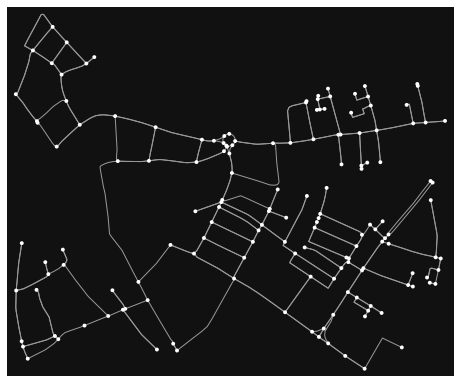

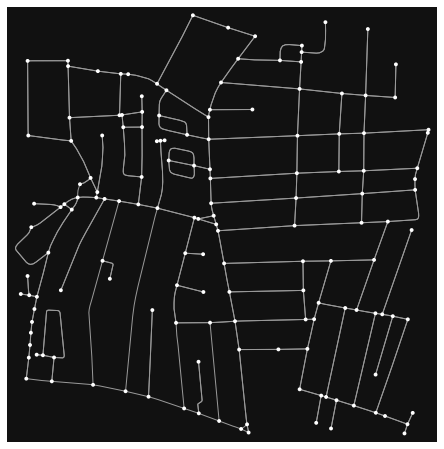

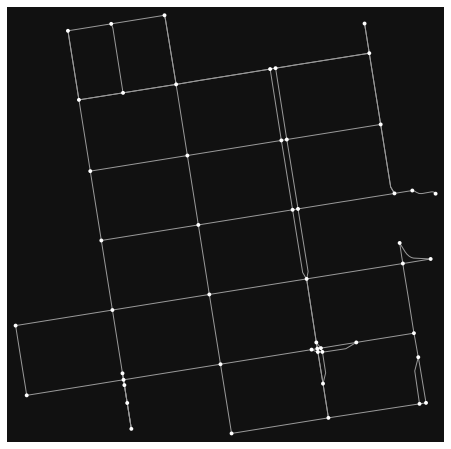

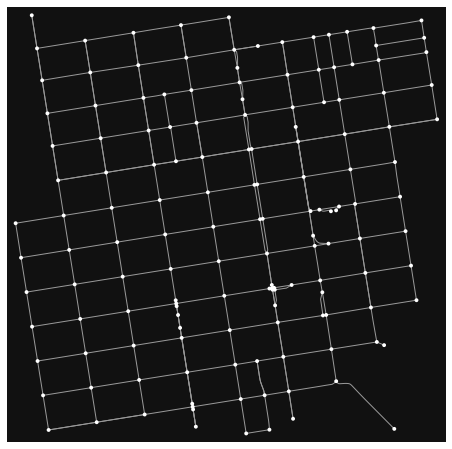

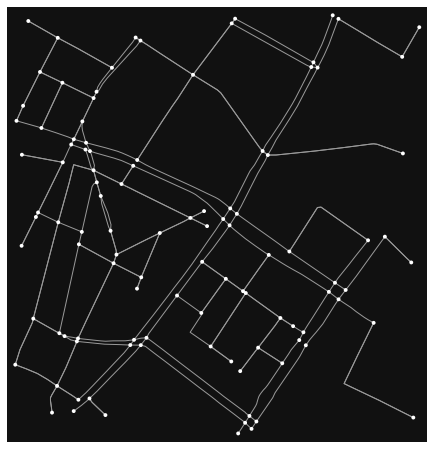

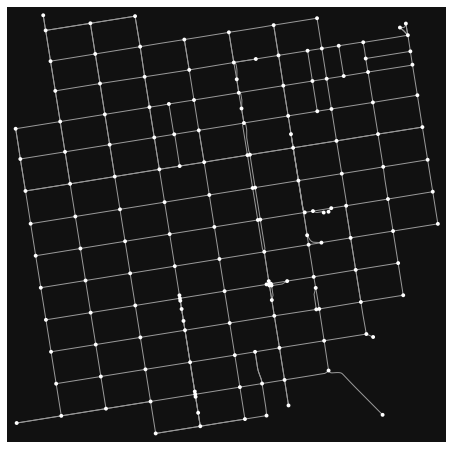

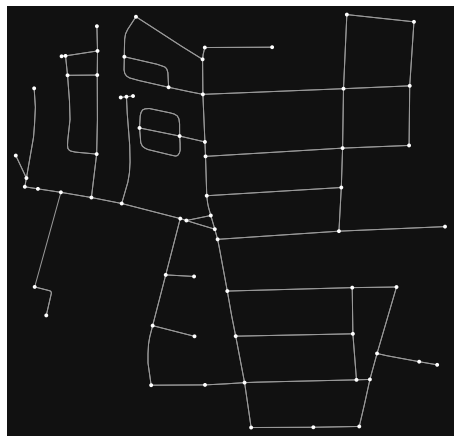

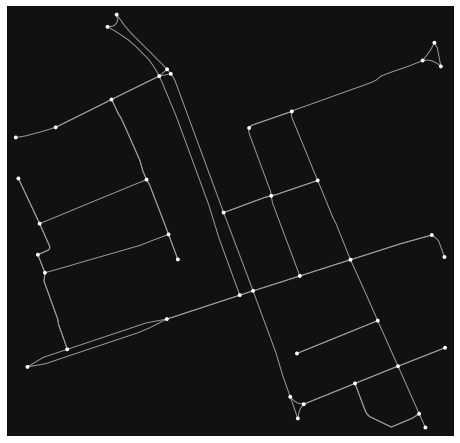

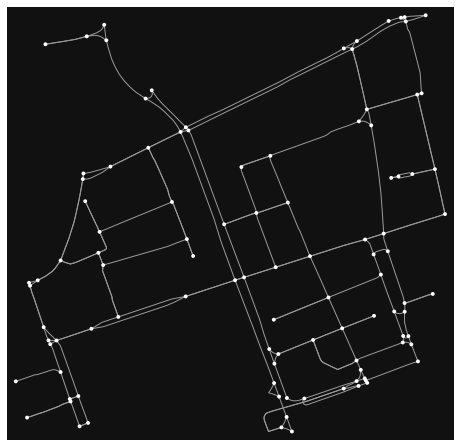

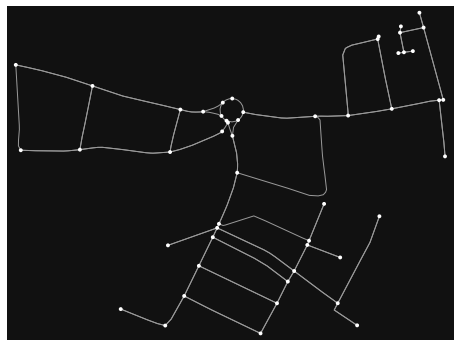

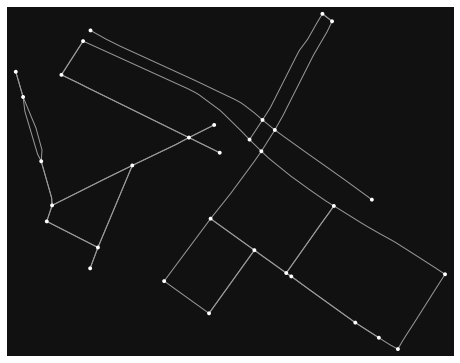

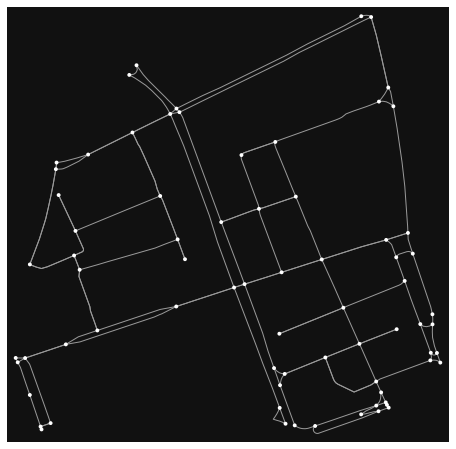

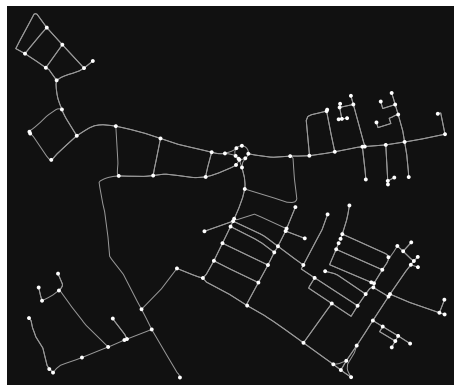

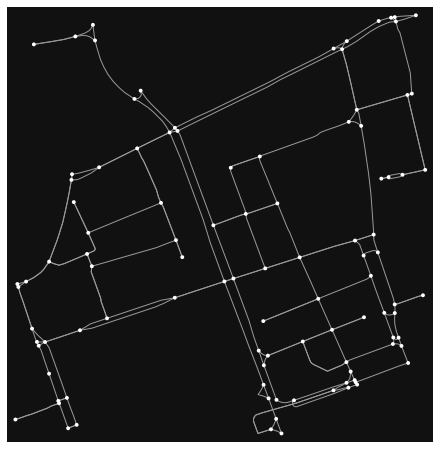

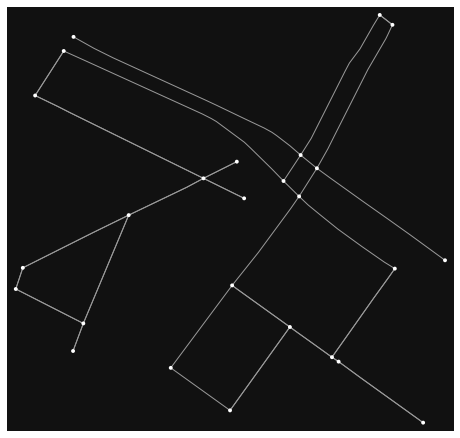

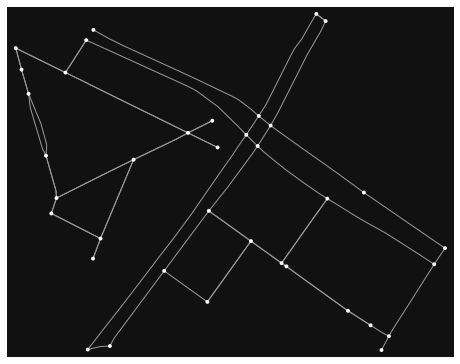

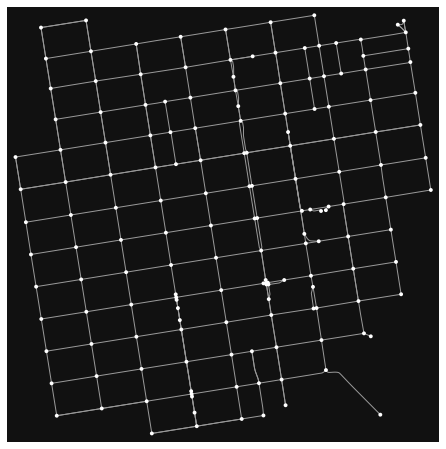

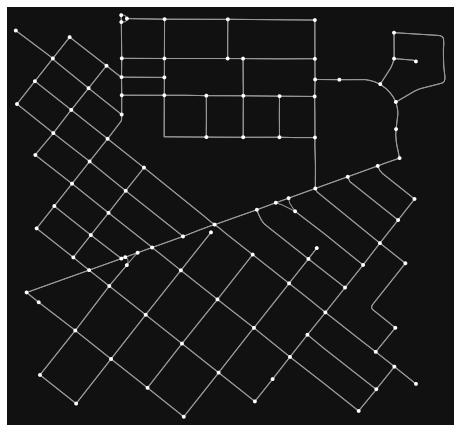

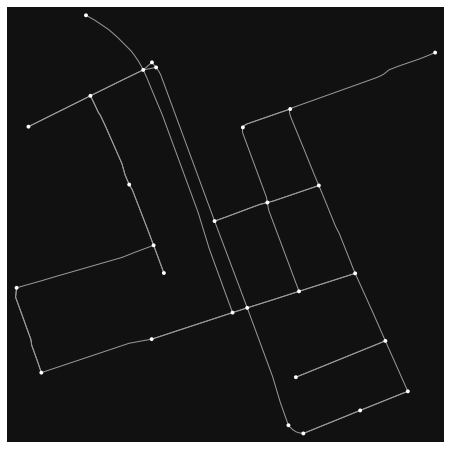

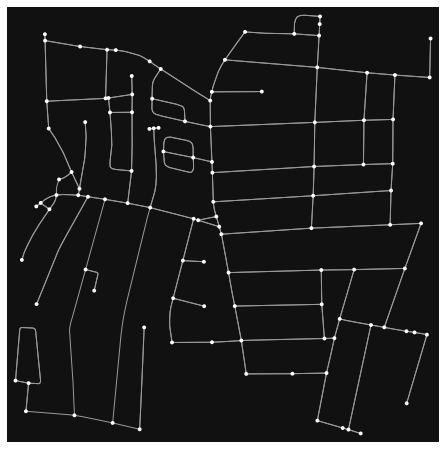

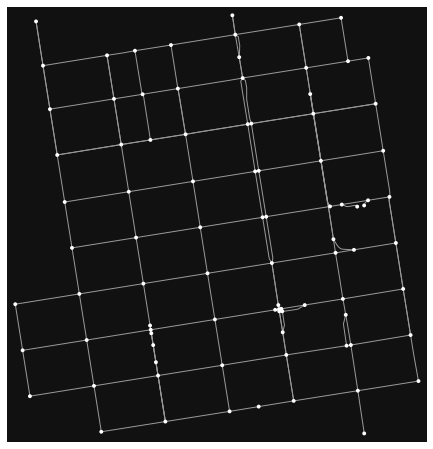

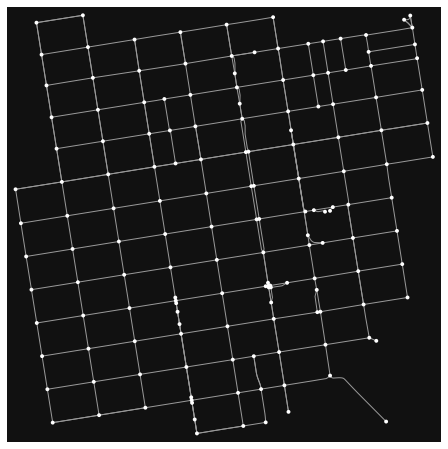

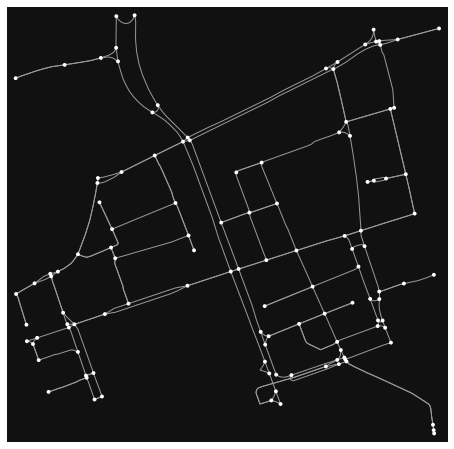

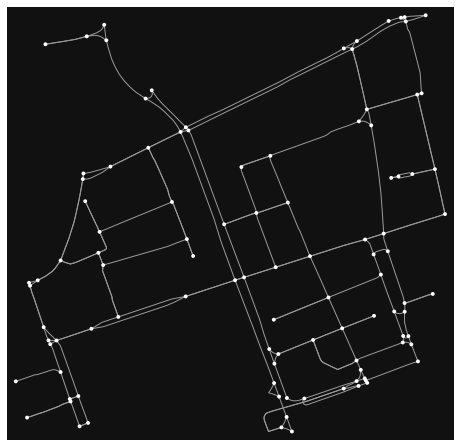

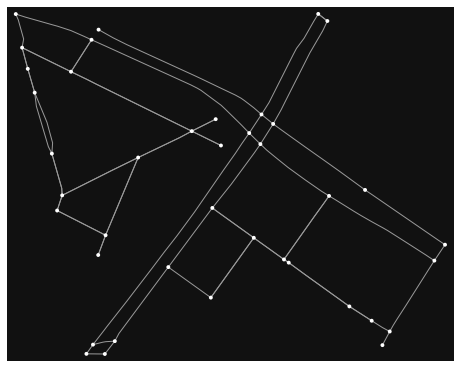

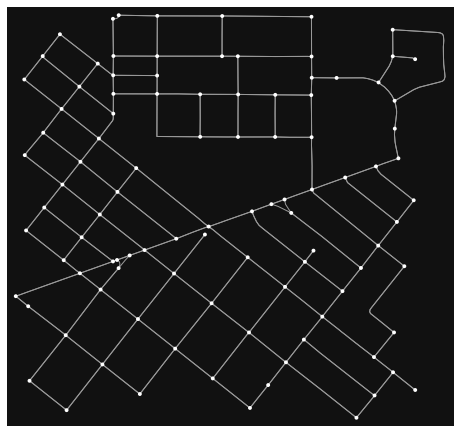

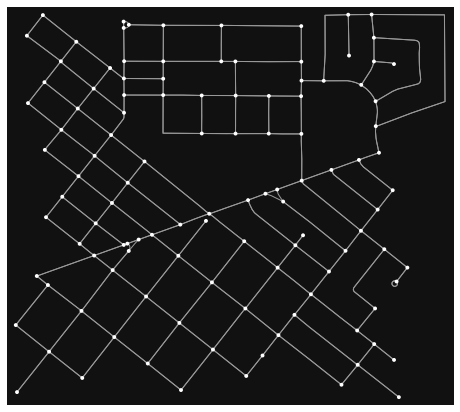

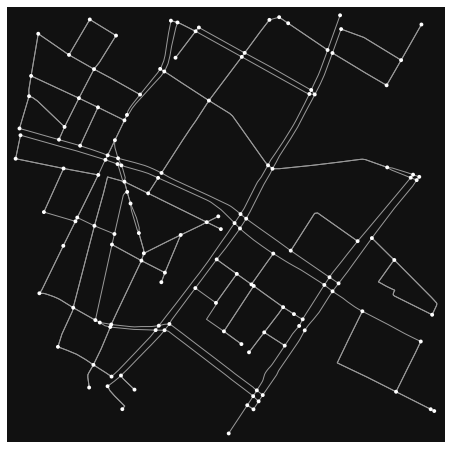

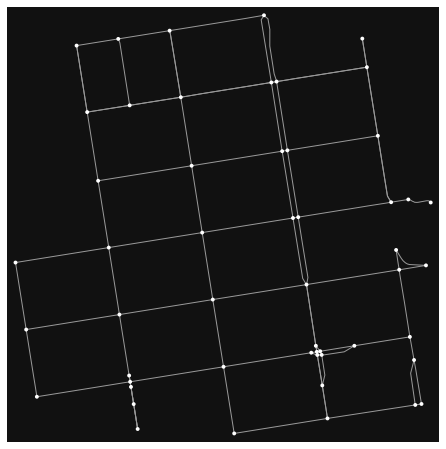

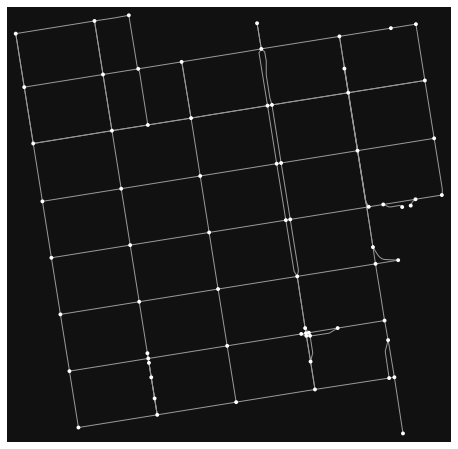

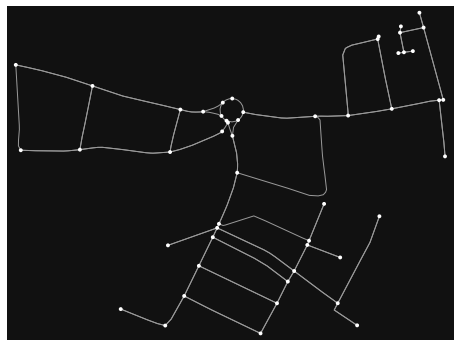

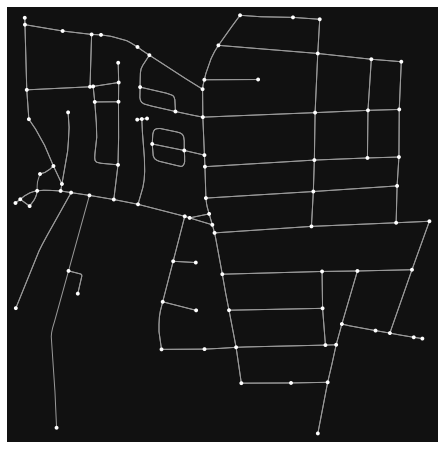

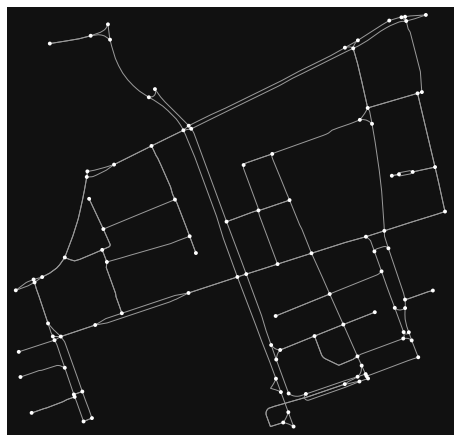

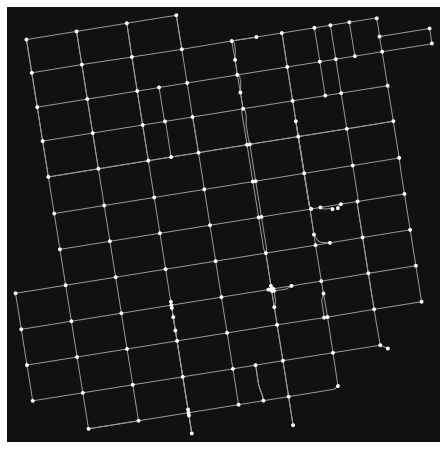

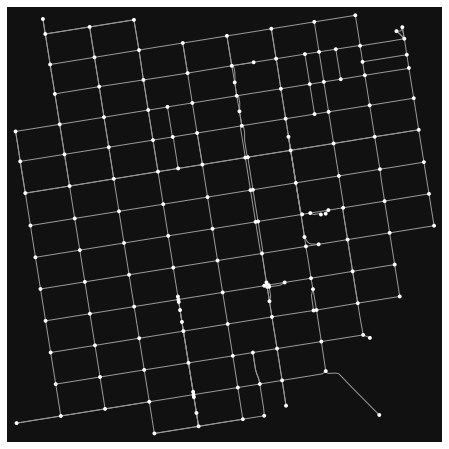

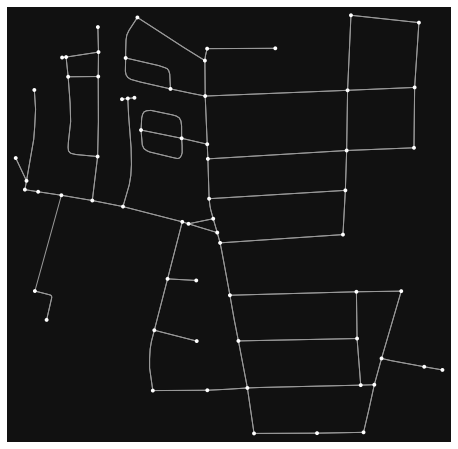

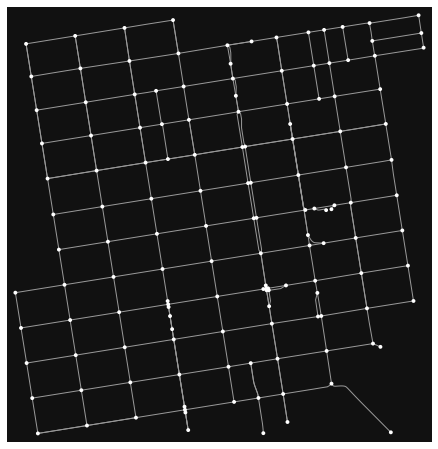

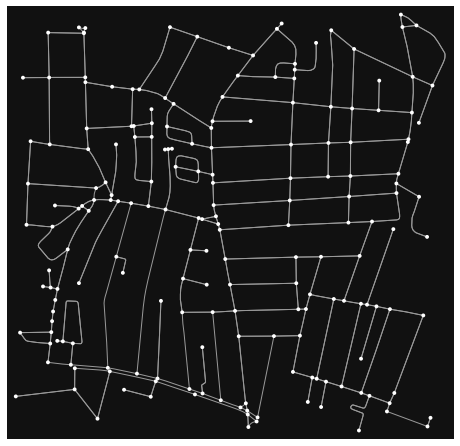

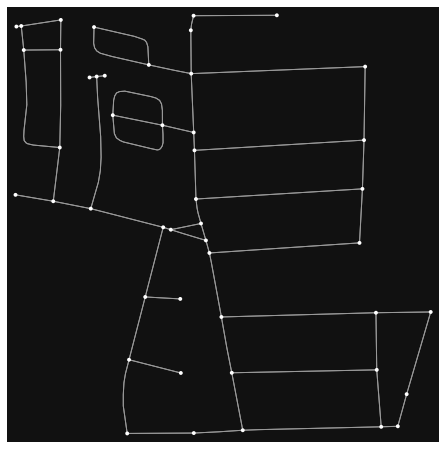

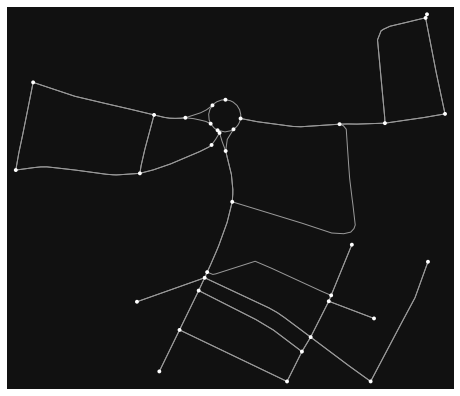

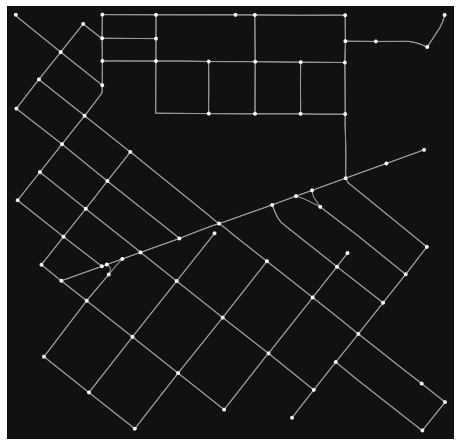

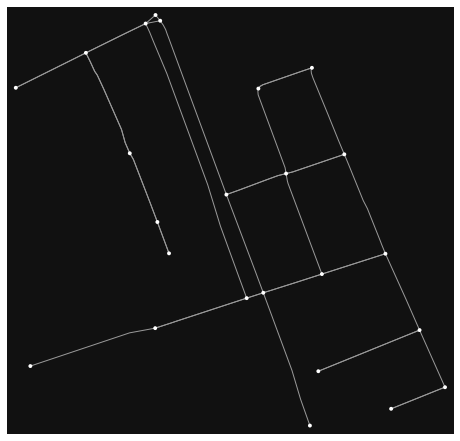

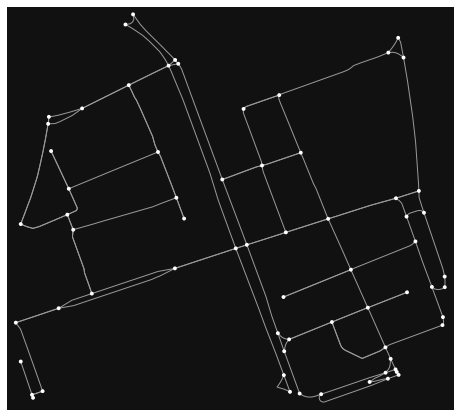

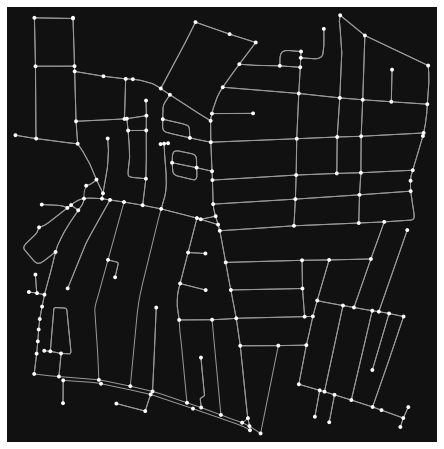

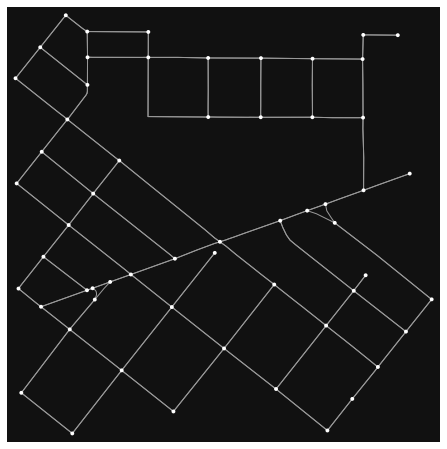

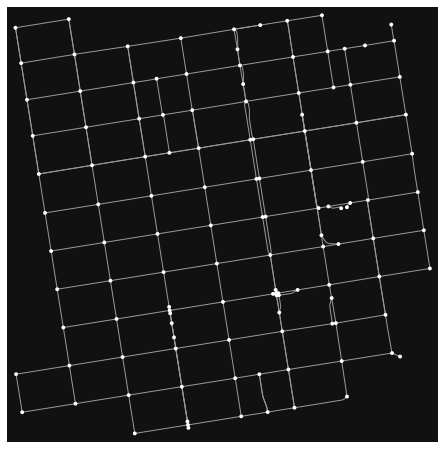

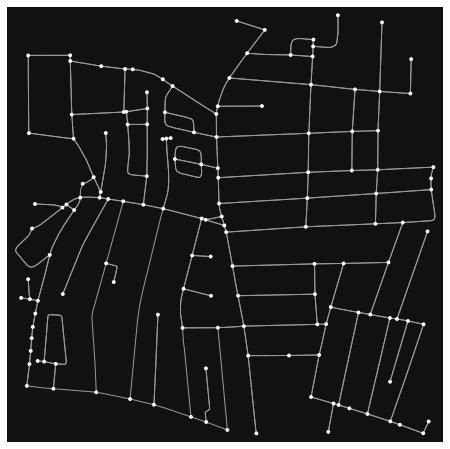

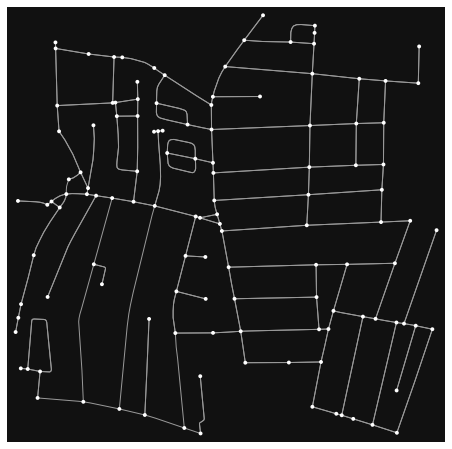

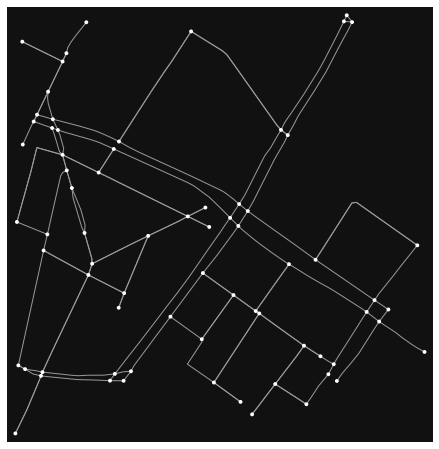

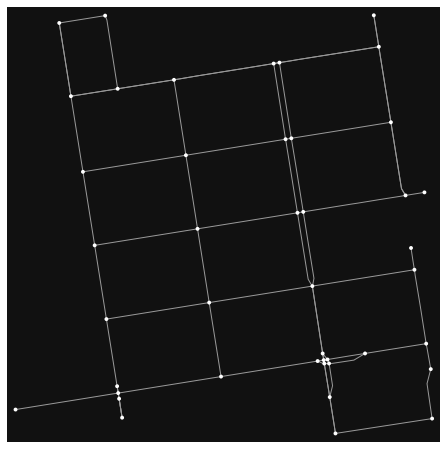

In [15]:
coords = [(37.79, -122.41), 
          (52.236219, 21.008218), 
          (52.207708, 0.126859), 
          (52.526885, 13.415033), 
          (-22.874405, -43.357217), 
          (37.442356, -122.143038)]
#coords = [New York, Warsaw, Cambridge, Berlin, Rio de Janeiro, Palo Alto]

def prepare_testcases(testcases, xmin, xmax):
    np.random.seed(42)
    it = 0
    
    for c in range(testcases):
        name = 'eval_' + str(it)
        it += 1

        c = int(np.random.uniform(0, len(coords)))
        X,Y = coords[c]
        range_around = np.random.uniform(xmin, xmax)
        
        G = ox.graph_from_point((X, Y), dist=range_around, network_type='drive')
        nodes_geometry = ox.graph_to_gdfs(G, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=False)['geometry']
        #G = osmnx.utils_graph.get_digraph(G, weight='length')
        mapping, revmap = calculate_node_mappings(G)
        ox.plot_graph(G)
        save_graph(G, name)

        save_as_simple_edgelist(G, name, mapping, nodes_geometry)

        #save_shortest_distances(G, name, revmap)

prepare_testcases(50, 250, 700)

In [ ]:
print("Finished")

417


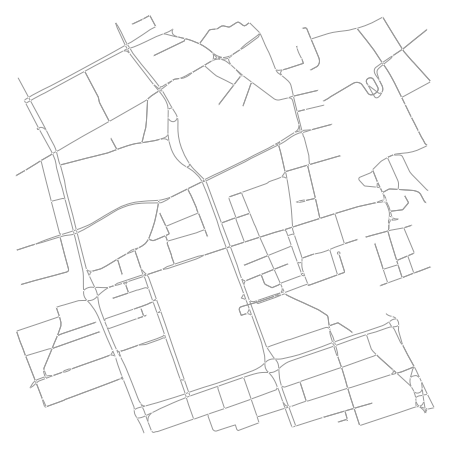

In [39]:
def prep_big():
    np.random.seed(42)
    X,Y = (52.236219, 21.008218)
    range_around = 1061.62
    name = 'biggraph'
    G = ox.graph_from_point((X, Y), dist=range_around, network_type='drive')
    print(len(G.nodes()))
    nodes_geometry = ox.graph_to_gdfs(G, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=False)['geometry']
    #G = osmnx.utils_graph.get_digraph(G, weight='length')
    mapping, revmap = calculate_node_mappings(G)
    ox.plot_graph(G, node_size=2, bgcolor='w')
    #save_graph(G, name)
    save_as_simple_edgelist(G, name, mapping, nodes_geometry)
    

prep_big()

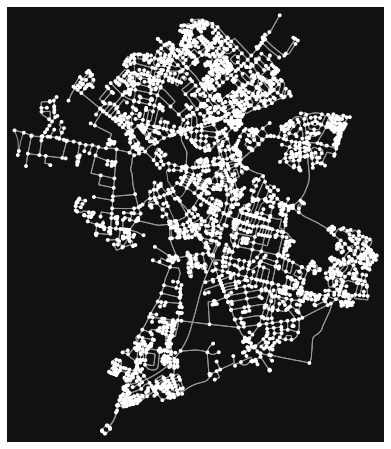

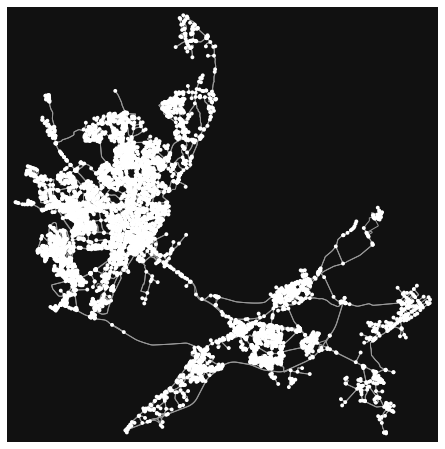

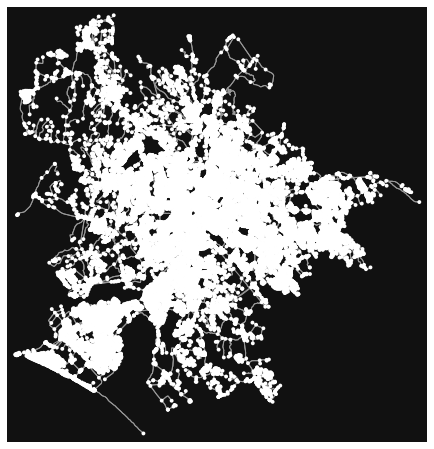

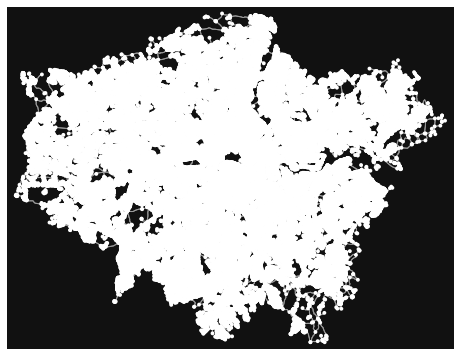

In [13]:
def get_SSSP_graphs(names):
    for name in names:
        G = ox.graph_from_place(name, network_type='drive')
        nodes_geometry = ox.graph_to_gdfs(G, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=False)['geometry']
        #G = osmnx.utils_graph.get_digraph(G, weight='length')
        mapping, revmap = calculate_node_mappings(G)
        ox.plot_graph(G)
        save_graph(G, name)
        save_as_simple_edgelist(G, name, mapping, nodes_geometry)
    
get_SSSP_graphs(['Cambridge,UK', 'Szczecin', 'Rome', 'London'])